Importing all the necessary functions and libraries to run the code

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns


Loading the data as pandas dataframe and specifying the required columns. I reduced the number of observations to only 22000 because Memory Error was being thrown because of heavy computations. I also shuffled the observations in Excel using the RAND function in a new column and then sorting all the values.

In [104]:
data=pd.read_csv('C:/Users/neeraj/Downloads/classification_data.tsv',sep='\t',nrows=22000)

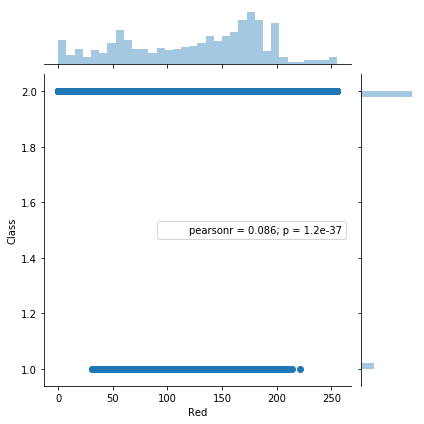

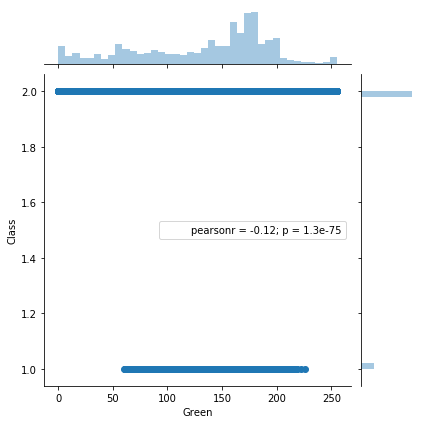

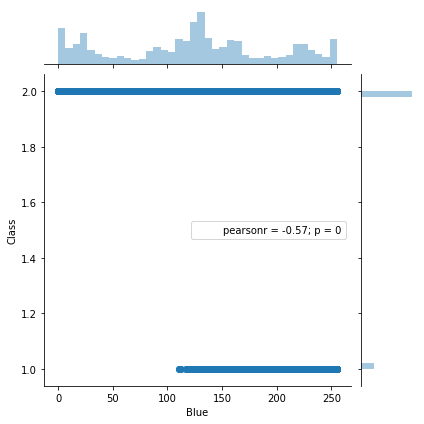

In [109]:
sns.jointplot(x="Red", y="Class", data=data)
sns.jointplot(x='Green',y='Class',data=data)
sns.jointplot(x='Blue',y='Class',data=data)
plt.show()

In [101]:
print(data)

       Red  Green  Blue  Class
0      108    153   210      1
1      128    131    86      2
2       50     96   143      1
3      198    198   158      2
4      117    155   219      1
5      136    139    90      2
6       69     72    23      2
7       33     77    70      2
8      148    186   250      1
9      199    197   163      2
10      31     81   133      1
11     118    148   225      1
12     155    158   112      2
13     120    154   213      1
14     202    201   163      2
15     126    128    92      2
16     179    177   129      2
17     183    182   138      2
18     185    186   170      2
19     180    177   133      2
20     104    100    65      2
21     138    139    89      2
22      87     90    51      2
23     116    148   214      1
24       9      7     0      2
25     177    174   129      2
26     170    171   131      2
27     178    146   103      2
28      25     12   234      2
29     156    157   101      2
...    ...    ...   ...    ...
21970   

Gives a description of the data

In [73]:
data.describe()

,108,153,210,1
count,22000.000000,22000.000000,22000.000000,22000.000000
mean,124.980273,132.390909,122.500227,1.794364
std,62.108570,60.032512,72.634329,0.404175
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,85.000000,67.750000,2.000000
50%,139.000000,154.000000,127.000000,2.000000
75%,176.000000,177.000000,163.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


Shows the correlation among the attributes

In [74]:
data.corr()

,108,153,210,1
108,1.000000,0.854499,0.507465,0.086254
153,0.854499,1.000000,0.669683,-0.123585
210,0.507465,0.669683,1.000000,-0.571934
1,0.086254,-0.123585,-0.571934,1.000000


Scaling the data to bring all the features in a common range so as to improve the predictability of the model.

In [75]:
scale = MinMaxScaler()
scaled_data = scale.fit_transform(data)

In [76]:
print(scaled_data)

[[ 0.50196078  0.51372549  0.3372549   1.        ]
 [ 0.19607843  0.37647059  0.56078431  0.        ]
 [ 0.77647059  0.77647059  0.61960784  1.        ]
 ..., 
 [ 0.17647059  0.38823529  0.60392157  0.        ]
 [ 0.          1.          1.          1.        ]
 [ 0.15294118  0.14509804  0.02352941  1.        ]]


Loading the features into 'predictors' variable and the target variable into 'target'

In [77]:
predictors=scaled_data[:,:3]
target=scaled_data[:,3:] 

Splitting the data into training and test datasets and using 20 % of the whole data to check the success of the model. Training data is used to fit the parameters to the model and test data is used to measure the accuracy of the model

In [78]:
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.2)
print(Y_train)
print(X_train)

[[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 1.]
 [ 0.]
 [ 1.]]
[[ 0.35294118  0.30980392  0.23137255]
 [ 0.70196078  0.70196078  0.52156863]
 [ 0.70588235  0.69803922  0.48627451]
 ..., 
 [ 0.30980392  0.18823529  0.82745098]
 [ 0.30588235  0.32941176  0.51372549]
 [ 0.10588235  0.32156863  0.24705882]]


Making prediction using Kernelized Ridge Regression with a linear kernel

In [87]:
from sklearn.kernel_ridge import KernelRidge
kernel_lin = KernelRidge(kernel='linear',alpha=1.0).fit(X_train,Y_train)
scores=cross_val_score(kernel_lin,X_test,Y_test,cv=5)
print("Accuracy using linear kernel ",scores.mean())

Accuracy using linear kernel  -0.406709850094


Making predictions using Kernelized Ridge Regression with polynomial kernel and gamma=1,r=1 and coefficients 2 and 3.

In [80]:
degrees=[2,3]
for val in degrees:
    poly_lin = KernelRidge(kernel='poly',alpha=1.0,coef0=1,degree=val).fit(X_train,Y_train)
    scores=cross_val_score(poly_lin,X_test,Y_test,cv=5)
    print("Accuracy using polynomial kernel ",val,scores.mean())

Accuracy using polynomial kernel  2 0.62878774183
Accuracy using polynomial kernel  3 0.682202746029


Making predictions using Kernelized Ridge Regression with a Gaussian kernel and different coefficients

In [81]:
coeff_sigs=[0.1,0.5,1,2,4]
for coeff in coeff_sigs:
    gaussian_kern=KernelRidge(kernel='rbf',gamma=coeff,alpha=1.0).fit(X_train,Y_train)
    scores=cross_val_score(gaussian_kern,X_test,Y_test,cv=5)
    print("For coefficient sigma: ",coeff,"accuracy is: ",scores.mean())

For coefficient sigma:  0.1 accuracy is:  0.57246984084
For coefficient sigma:  0.5 accuracy is:  0.727715283552
For coefficient sigma:  1 accuracy is:  0.80742039426
For coefficient sigma:  2 accuracy is:  0.86820366381
For coefficient sigma:  4 accuracy is:  0.910905510236


Making predictions using Logistics Regression

In [85]:

log_reg = linear_model.LogisticRegressionCV(cv = 5,).fit(X_train,Y_train)
Y_predicted_log = log_reg.predict(X_test)
Y_predicted_log = np.round(Y_predicted_log)
print("Accuracy using logistic regression is: ",accuracy_score(Y_test, Y_predicted_log))

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy using logistic regression is:  0.925454545455


Using Soft SVM with different coefficients and Grid Search to perform an exhaustive search for the best parameters among a given set of parameters. Here GridSearch finds the best coefficient.

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
soft_svm = GridSearchCV(svm.SVC(), cv=5,param_grid={"C": [0.1, 0.5, 1,2,5]})
soft_svm.fit(X_train, Y_train)
Y_predicted_svsm = soft_svm.predict(X_test)
print('Accuracy is :', accuracy_score(Y_test,Y_predicted_svsm))

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

Accuracy is : 0.987045454545


Using Hard SvM to build a model

In [83]:
hard_svm = GridSearchCV(svm.SVC(), cv=5,param_grid={"C":[9876543210]})
hard_svm.fit(X_train, Y_train)
Y_predicted_hsvm = hard_svm.predict(X_test)
print('Accuracy is :', accuracy_score(Y_test,Y_predicted_hsvm))

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

Accuracy is : 0.998636363636


The best model for the given dataset is Hard SVM and it is close to being flawlessly accurate with an accuracy of 0.998